# Practical Machine Learning                                                                             
# Lab 1

## Exercises

### 1.[Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/images.zip), we have 8 images, read the images, flatten them, then store them in a numpy array. Before storing the images divide them by 255.
The numpy array should have the dimension equals to (8, 64, 64, 3), in order to check the dimension use the $shape$ attribute.

In [4]:
import numpy as np
from matplotlib.pyplot import imread
image_folder = "./images/"

list_images = []
import os
imgs = os.listdir('images')
for i, path in enumerate(imgs):
    img = imread("./images/" + path)
    list_images.append(img)

    
images = np.asarray(list_images)
print(images.shape)

(8, 64, 64, 3)


### 2. Compute the mean of the images.


In [6]:
mean = np.mean(images, axis=0)
print(mean.shape)

(64, 64, 3)


### 3. Normalize the images by subtracting the mean from each image.

In [7]:
images = images - mean
print(images.shape)

(8, 64, 64, 3)


### 4. [Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/weights.zip), we have the weights and the bias for a perceptron that classifies the images in 4 classes. Use the weights (use np.load(‘path’) to load the weights) and the images (after normalization) to compute (y_hat) the predictions of the perceptron.  
  $$ y_{hat} = softmax(X * W + b) $$
  $$ X - input, W - weights, b - bias $$
  $$Softmax(z_i)=\frac{e^{z_i}}{\sum_{j=1}^{j=K} e^{z_j} }$$

In [8]:
W = np.load('./coefs.npy')
b = np.load('./bias.npy')


images = images.reshape((8, 64*64*3))
# print(W.shape)
# print(b)


def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)


y_hat = softmax(np.matmul(images, W) + b)

results = np.argmax(y_hat, axis = 1)

results

(8, 12288)


array([3, 1, 2, 0, 0, 1, 2, 2])

### 5. Let the ground-truth labels be y = [0, 0, 1, 1, 2,  2, 3,  3]. Compute the accuracy of the classifier (define a new function accuracy_score). 
$$Accuracy = \frac{1}{n} \sum_{i=1}^{j=n} y_{pred}^i == y_{true}^i$$

In [85]:
acc =  sum((np.array([0, 0, 1, 1, 2, 2, 3, 3]) - results))/results.size
acc

0.125

### 6. The labels of the classes are: (Cat - 0,  Dog - 1, Frog - 2,  Horse - 3), print the label for each prediction (use a dictionary). 


In [9]:
labels = {0: 'Cat',
         1: 'Dog',
         2: 'Frog',
         3: 'Horse'}

for i, path in enumerate(imgs):
    print(path, labels[results[i]])


07.png Horse
04.png Dog
06.png Frog
01.png Cat
02.png Cat
03.png Dog
08.png Frog
05.png Frog


### 7. Display the mean image (use imshow from Matplotlib).
#### Don’t forget to multiply the image by 255.

(8, 64, 64, 3)


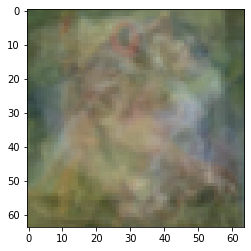

In [88]:
from matplotlib.pyplot import imshow

print(images.shape)

x = np.mean(images, axis=0) * 255

imshow(x.astype(int))b
